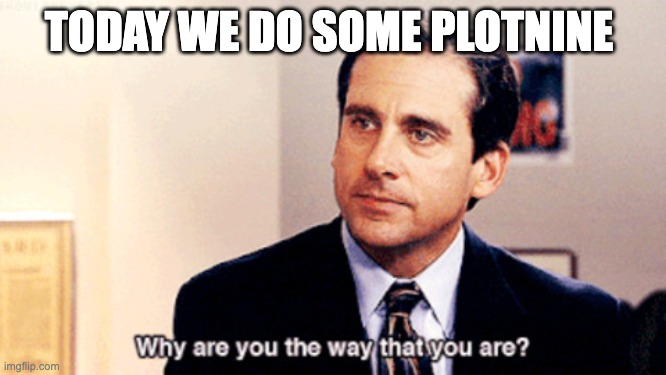

For most graphs, we will be using `plotnine` today, which is the equivalent of R's `ggplot2` in python. It follows the grammar of graphics. 

There are many options available in python regarding data visualization libraries, such as `matplotlib`, `altair`, `bokeh`, `seaborn`, `pygal`, ... but imo `plotnine` hits all the marks in terms of:
- pure aesthetics from scratch
- code readability / review 
- adaptability to the requirements

That being said:
- for interactive plots, we will focus on `plotly` (maps included although `folium` is nice as well)
- for network representation, we will look into the `pyvis` library

## Imports

In [ ]:
# <!> please - pull all imports here as notebook cells can be run in various order

# data manipulation
import pandas as pd 

# small computations
import numpy as np

# plotnine is a dataviz library
# we need to import required elements
from mizani.transforms import trans, trans_new # scale transformations
from plotnine import * 
# from plotnine import ggplot, aes,\
#    geom_point, geom_line, geom_abline, geom_linerange, geom_count, geom_bar, geom_col,geom_histogram,geom_text,\
#        labs,theme,element_text,element_line,geom_vline,\
#            coord_flip,facet_grid,facet_wrap,scale_x_continuous,scale_y_continuous

# pyvis - network visualization
from pyvis.network import Network

# plotly
import plotly.graph_objects as go
import plotly.express as px


## Load datasets

In [ ]:
from constants import characters, characters_group, characters_edges, filming_locations
characters.head()

,id,name,species,gender,height,weight,hair_color,eye_color,skin_color,year_born,homeworld,year_died,description
0,1,Luke Skywalker,Human,Male,1.72,77.0,Blond,Blue,Light,19.0,Tatooine,-34.0,The main protagonist of the original trilogy.
1,2,Leia Organa,Human,Female,1.50,49.0,Brown,Brown,Light,19.0,Alderaan,-35.0,A leader in the Rebel Alliance and twin sister...
2,3,Darth Vader,Human,Male,2.02,136.0,NaN,Yellow,Pale,41.0,Tatooine,-4.0,The Sith Lord formerly known as Anakin Skywalker.
3,4,Yoda,Yoda's species,Male,0.66,17.0,White,Brown,Green,896.0,Unknown,-4.0,A wise and powerful Jedi Master.
4,5,Han Solo,Human,Male,1.80,80.0,Brown,Hazel,Light,29.0,Corellia,-34.0,A smuggler turned hero in the Rebel Alliance.


# Graphs w/ `plotnine`

[Plotnine website](https://plotnine.org/) contains clean documentation (see Reference) and examples sorted by plot types (see Gallery). 

Todo list of geometries:
- scatterplot
- barplot
- histogram w/ facets
- boxplot
- line and linerange

We will also see how to add text and to customise your graphs

## Grammar of graphics

| Element | Methods in the code | Description |
| ------- | ----------- | ----------- |
| Data | None | the prepared input dataset |
| Aesthetics | `aes()` | links between variables and representation (x, y, fill, color, size, shape, alpha, ...) |
| Geometries | `geom_*` | type of representations (line, boxplot, histogram, point, ...) |
| Facets | `facet_*` | multiple plots of subgroups |
| Statistics | None | Parameter choices, computations done prior to plot |
| Coordinates | `scale_*`, `coord_*` | scaling elements |
| Themes | `labs()`, `theme()` | design elements of the plot, not-linked to the data |

## Scatterplot, detailed

/opt/conda/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


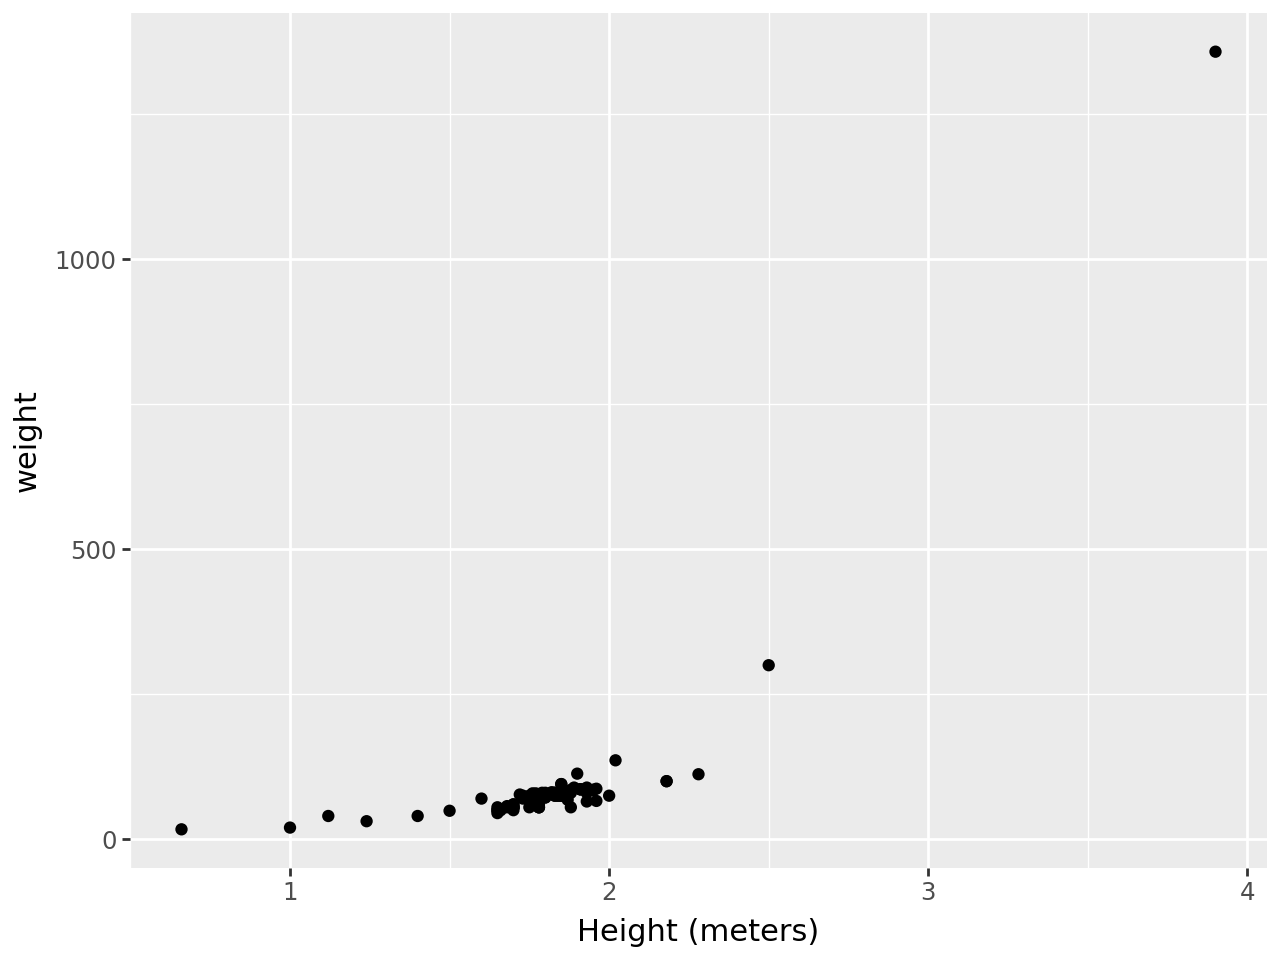

In [3]:
# Step-by-step

ggplot(characters) # blank canvas
ggplot(characters)+aes(x='height', y='weight') # canvas with aesthetics and coordinates set up
ggplot(characters)+aes(x='height', y='weight')+geom_point() # adding geometry
ggplot(characters)+aes(x='height', y='weight')+geom_point()+labs(x='Height (meters)') # adding theme


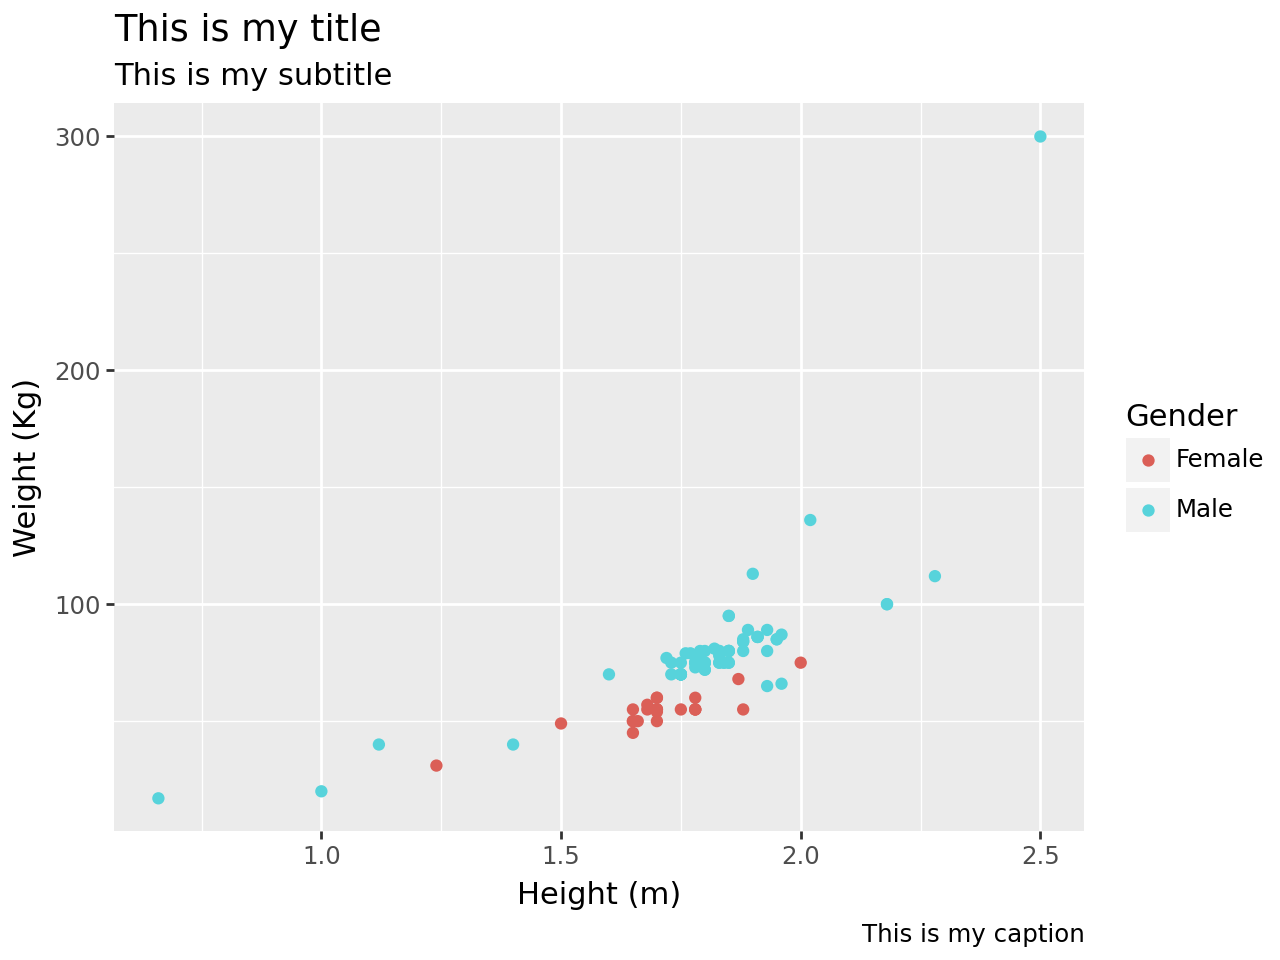

In [4]:
# Nice final exampls
(
    ggplot(characters.query('weight<500'))+
    aes(x='height', y='weight', color='gender')+
    geom_point()+
    labs(x='Height (m)', y='Weight (Kg)', color='Gender', 
    title='This is my title', subtitle='This is my subtitle', caption='This is my caption')
)

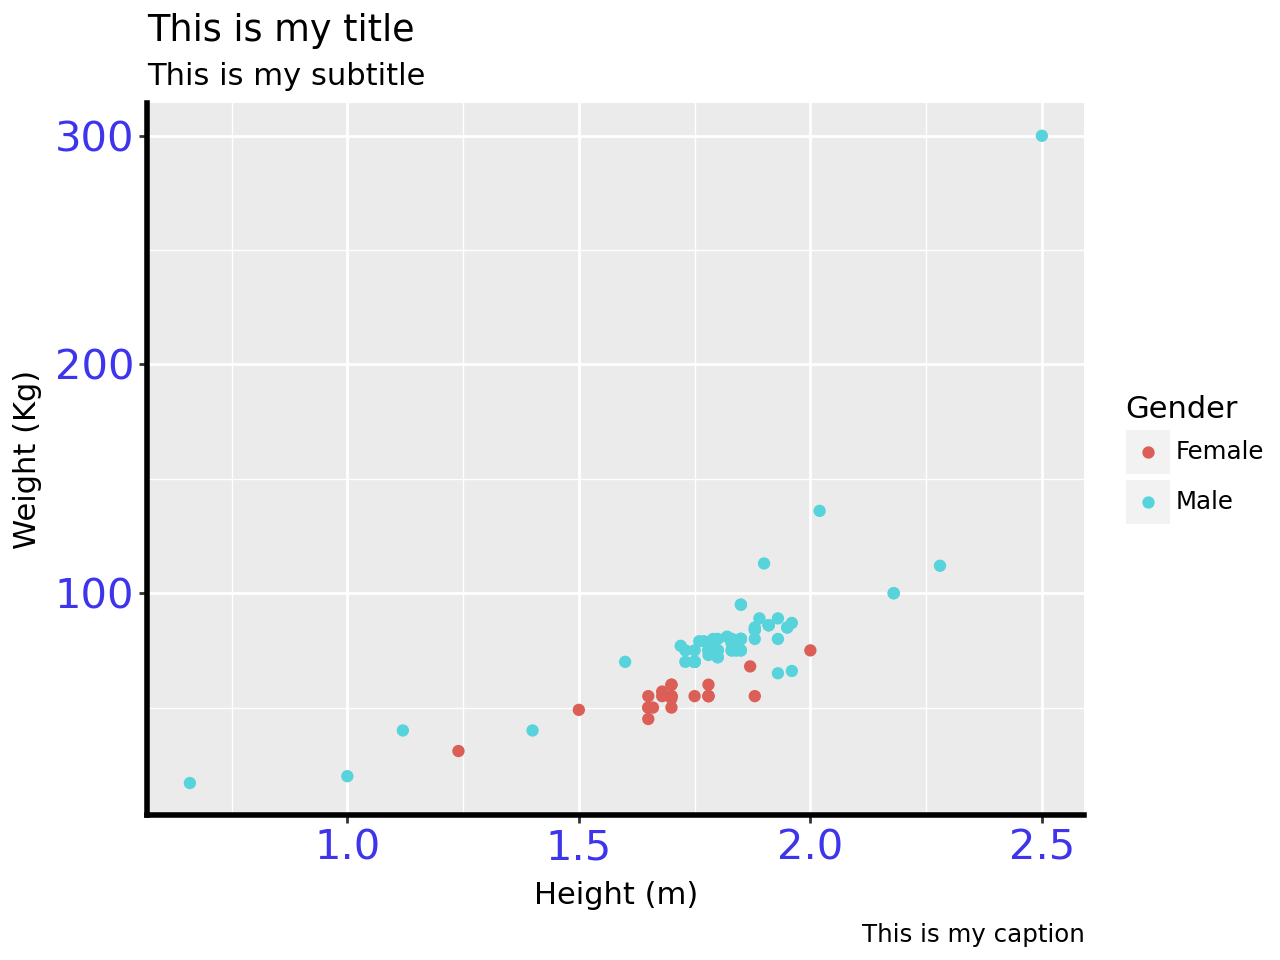

In [5]:
# theme
# checkout: https://plotnine.org/reference/theme.html
(
    ggplot(characters.query('weight<500'))+
    aes(x='height', y='weight', color='gender')+
    geom_point()+
    labs(x='Height (m)', y='Weight (Kg)', color='Gender', 
    title='This is my title', subtitle='This is my subtitle', caption='This is my caption')+
    theme(
        axis_line=element_line(size=2), 
        axis_text=element_text(colour='#3d34eb', size=15, margin={"t": 5, "r": 5})
    )
)

## Barplot & Countplot

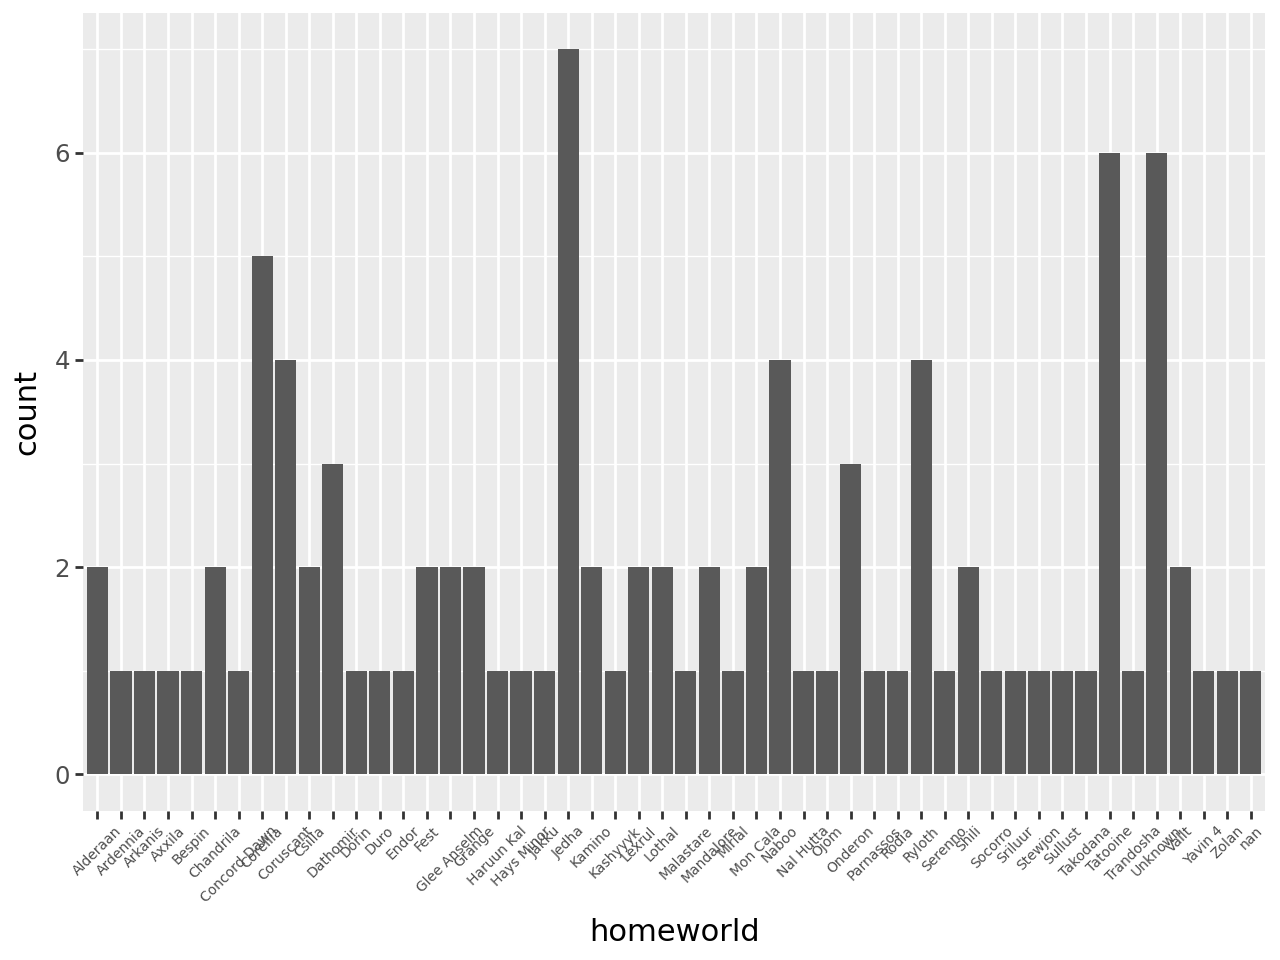

In [6]:
# option 1
(
    ggplot(characters)+
    aes(x='homeworld')+
    geom_bar()+
    theme(axis_text_x=element_text(angle=45, size=5))
)

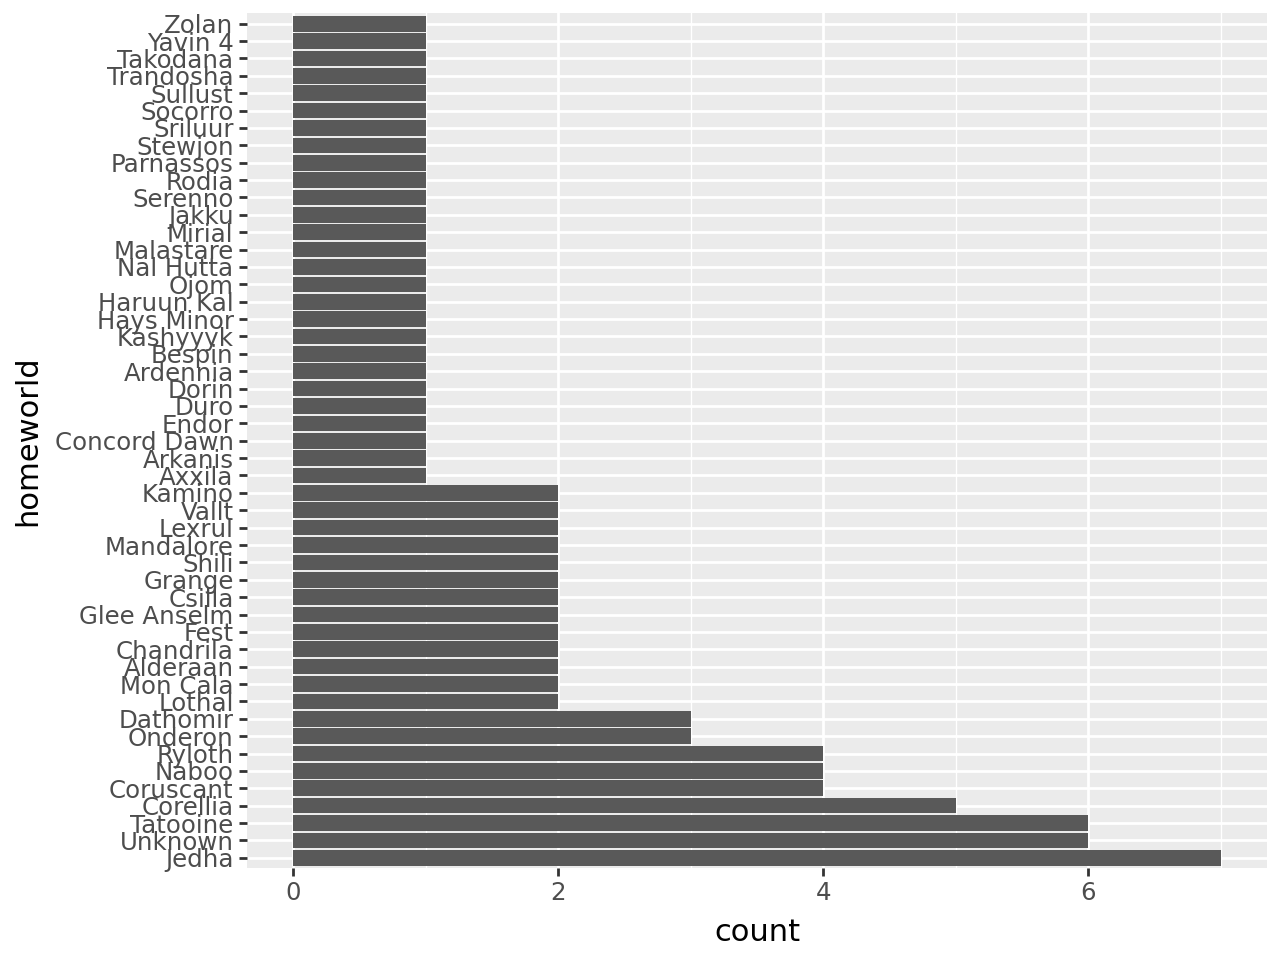

In [7]:
# option 2
# <!> trick with categorical data: imposing them a set of modalities
# + the coord_flip to better visualize the names
count_per_homeworld = (
    characters
    .value_counts('homeworld')
    .reset_index()
    .assign(homeworld=lambda df: pd.Categorical(df.homeworld, categories=df.homeworld))
)
ggplot(count_per_homeworld)+aes(x='homeworld', y='count')+geom_col()+coord_flip()

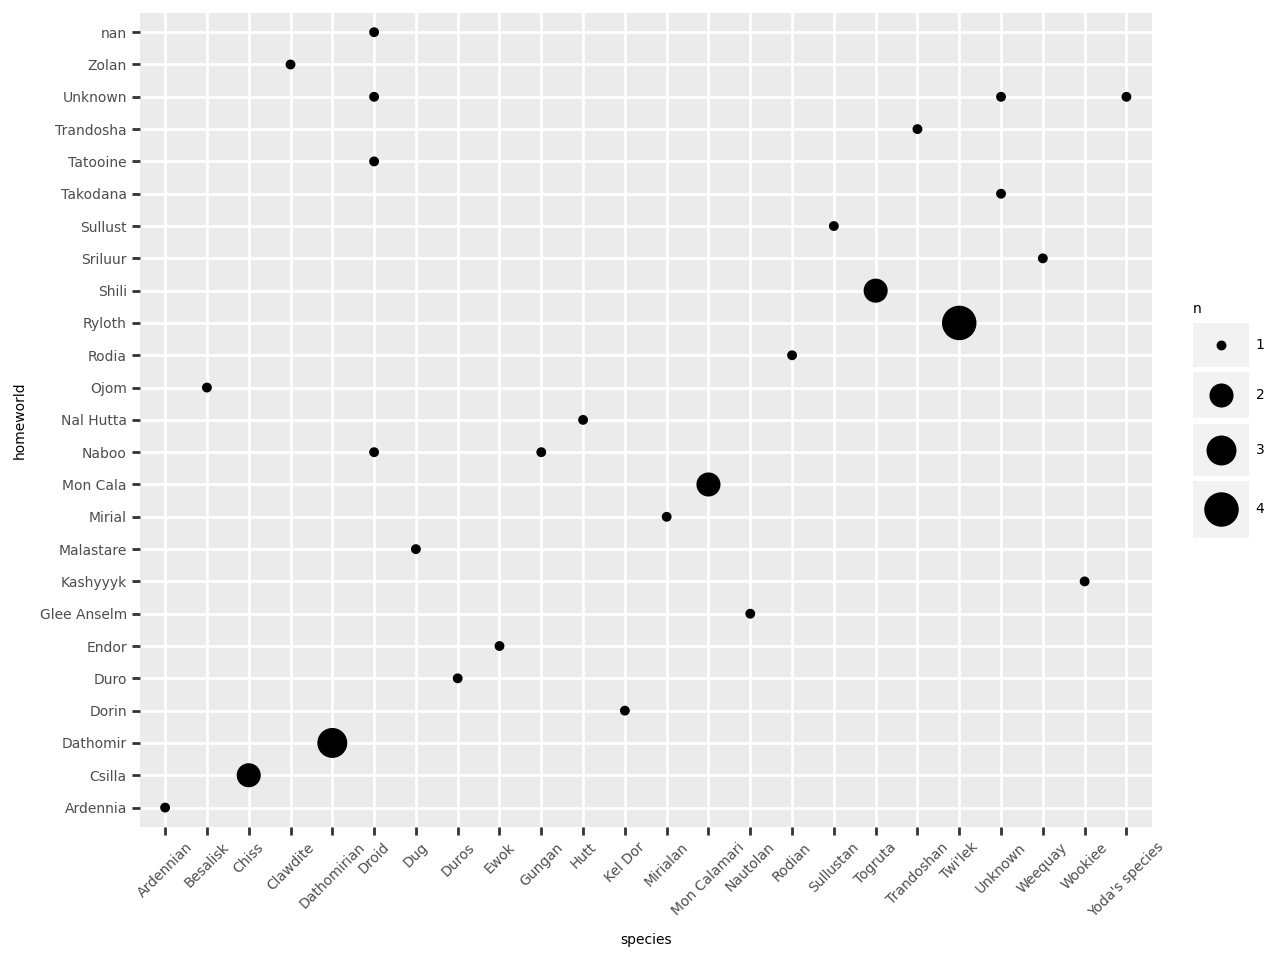

In [8]:
# here we do what is commonly known as a Bubble chart
(
    ggplot(characters.query('species != "Human"'))+
    aes(y='homeworld', x='species')+
    geom_count()+
    theme(text=element_text(size=5), axis_text_x=element_text(angle=45))
)

## Histogram across groups

/opt/conda/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 89'. Pick better value with 'binwidth'.
/opt/conda/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 2 rows containing non-finite values.


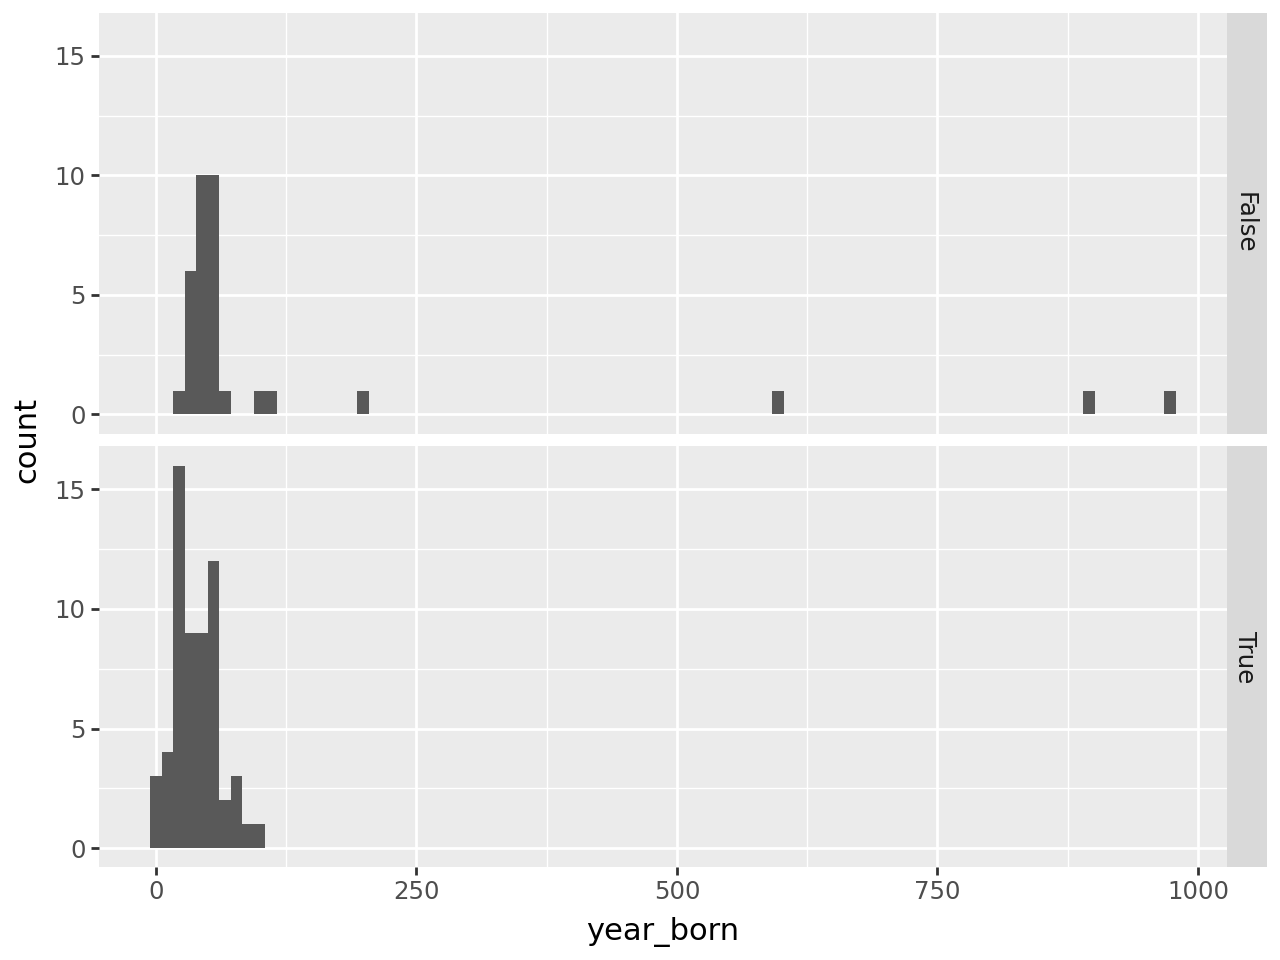

In [9]:
# using facets
(
    ggplot(characters.assign(is_human=lambda df: df.species=="Human"))+
    aes(x='year_born')+
    geom_histogram()+
    facet_grid('is_human')
)

/opt/conda/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 89'. Pick better value with 'binwidth'.
/opt/conda/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 2 rows containing non-finite values.


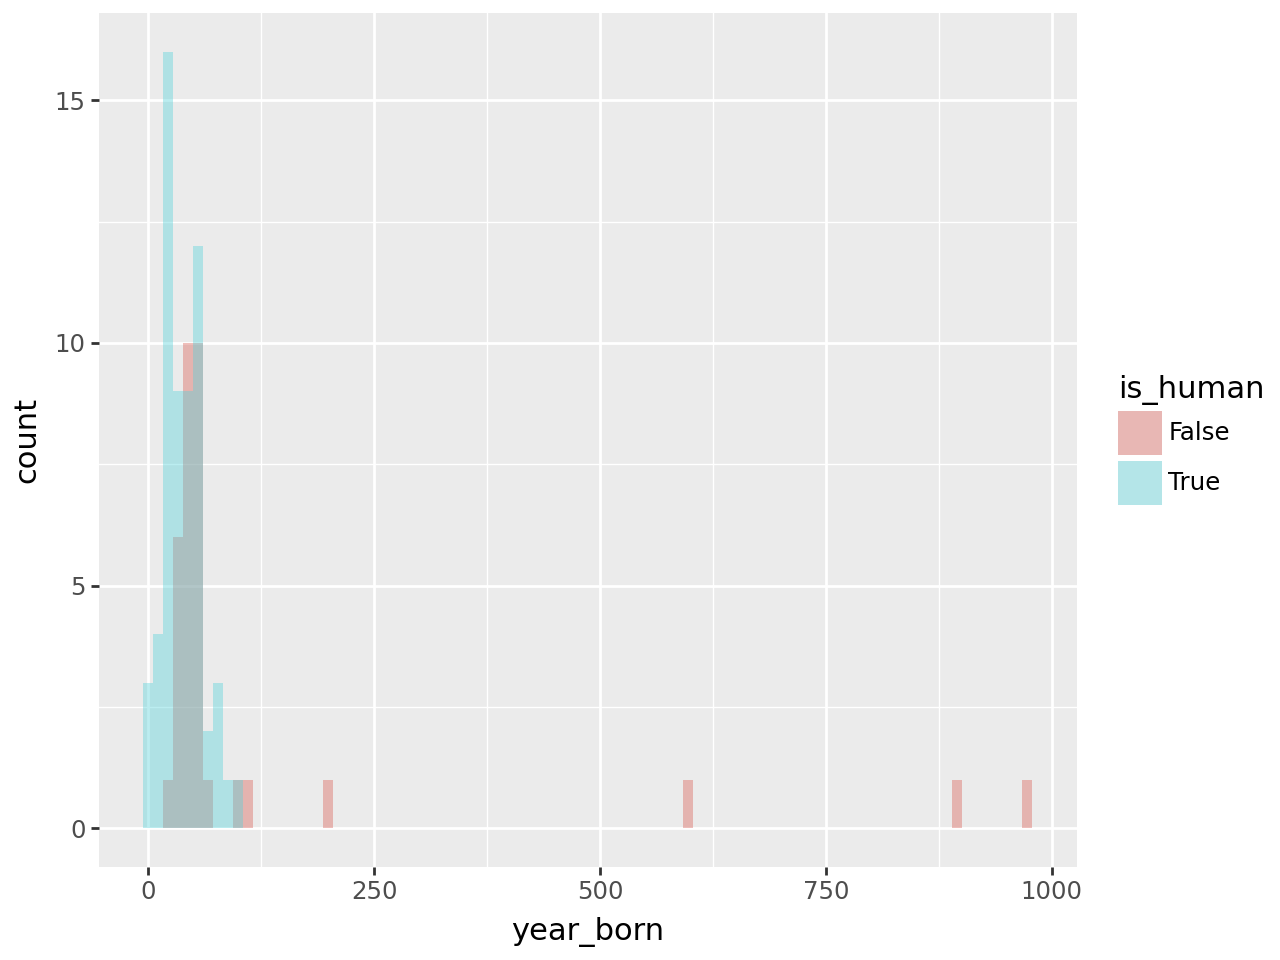

In [10]:
# when geometries coincide for different groups, the position argument defines what is the approach 
# * identity - overlay
# * dodge - aside another
# * stack - ontop of another
# default behavior may vary with the geometries
(
    ggplot(characters.assign(is_human=lambda df: df.species=="Human"))+
    aes(x='year_born', fill='is_human')+
    geom_histogram(position='identity', alpha=0.4) 
)

## Lines

/opt/conda/lib/python3.12/site-packages/mizani/transforms.py:303: FutureWarning: This function has been deprecated and will be removed in a future version. You should create transforms explicitly using the class syntax.


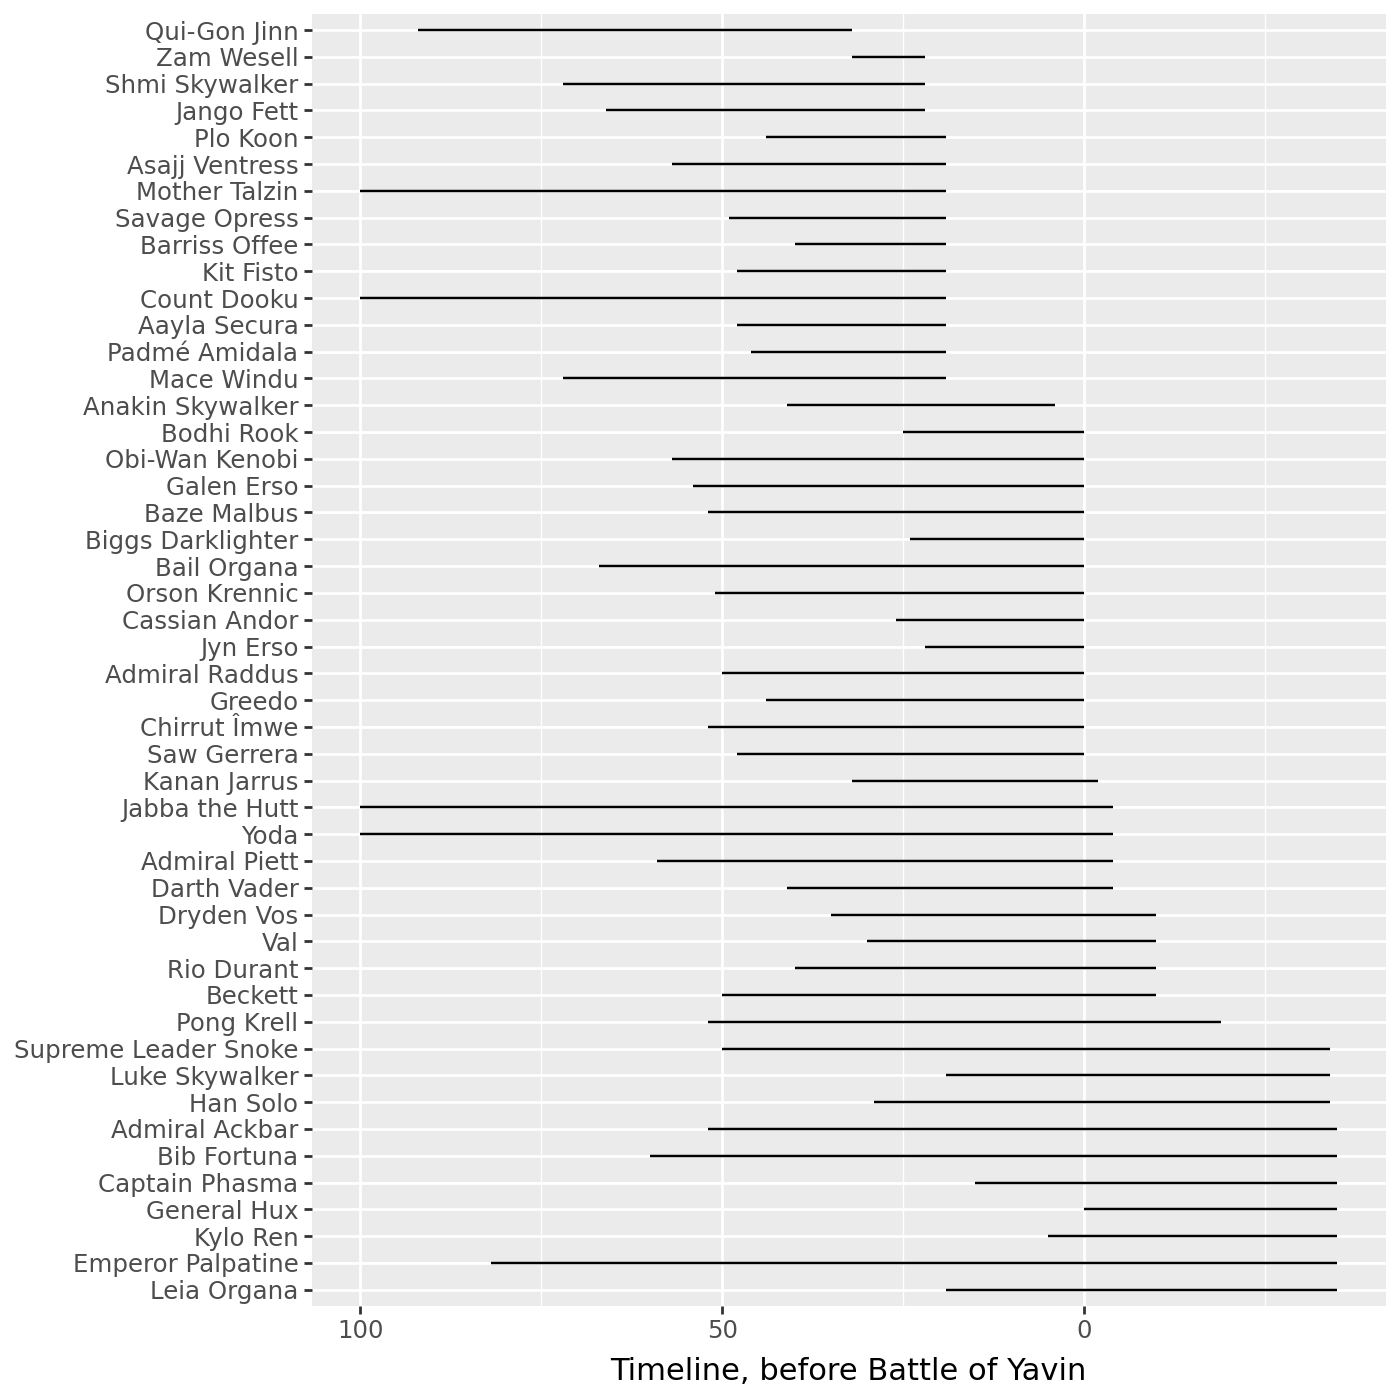

In [11]:
# transformation equation on the x axis
def tr_eq(x):
    return -x

# prepare dataset
tmp = (
    characters
    [['year_born', 'year_died', 'name']]
    .drop_duplicates()
    .dropna()
    .assign(year_born=lambda df: df.year_born.clip(upper=100))
    .sort_values('year_died')
    .assign(name=lambda df: pd.Categorical(df.name, categories=df.name))
)

# plot
(
    ggplot(tmp)+
    aes(ymin='year_born', ymax='year_died', x='name',label='name')+
    geom_linerange()+
    scale_y_continuous(trans=trans_new('my', lambda x: [tr_eq(xi) for xi in x], lambda x: [tr_eq(xi) for xi in x]))+
    labs(
        x = '', y = 'Timeline, before Battle of Yavin'
    )+
    coord_flip() +
    theme( figure_size=(7, 7) ) 
)

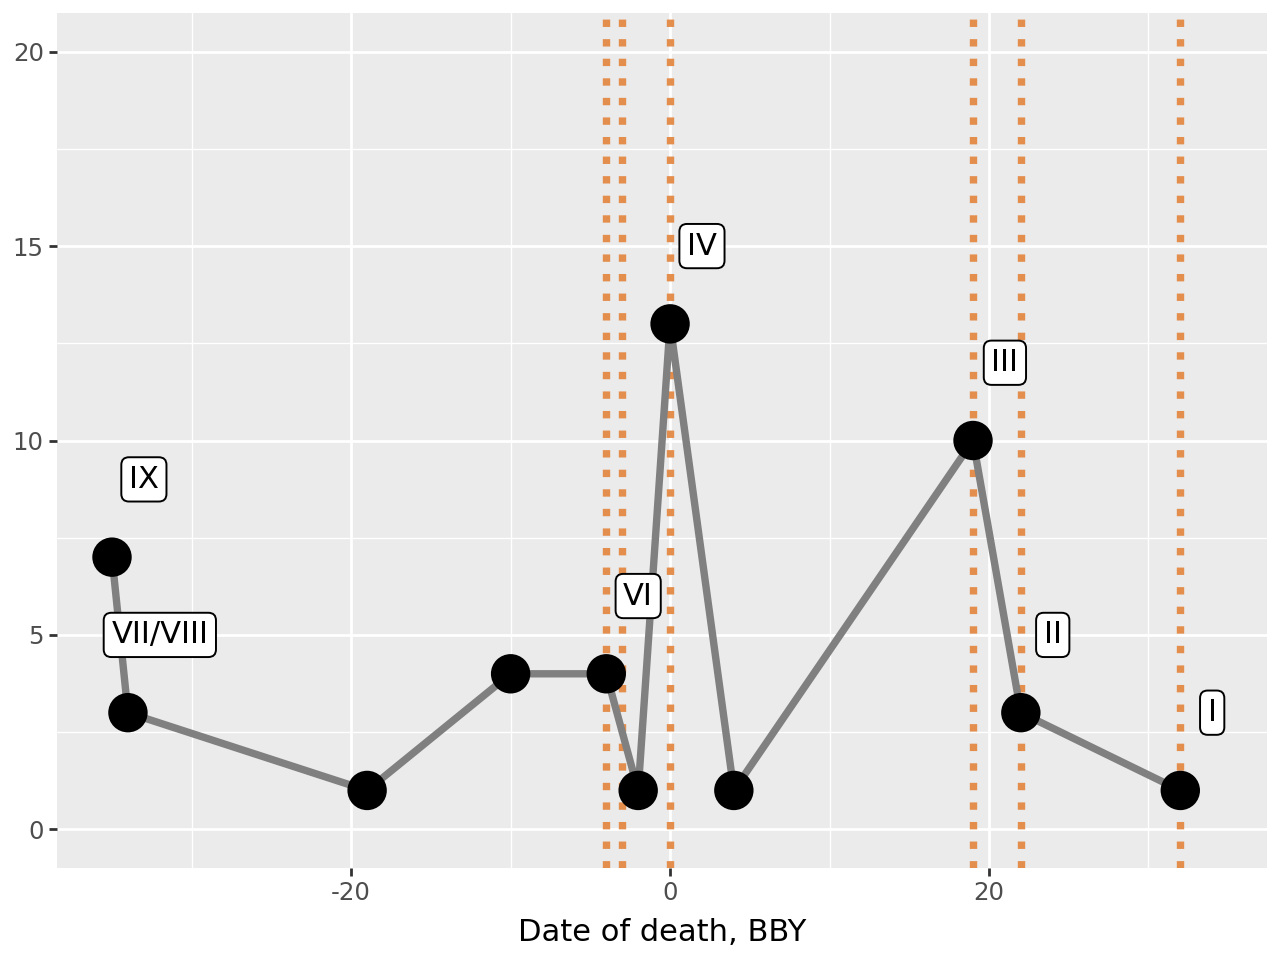

In [12]:
# define for each movie the date in which they are set
dic_movies = pd.DataFrame([['I', 32], ['II', 22], ['III', 19], ['IV', 0], ['V', -3], ['VI', -4], ['VII/VIII', -34], ['IX', -35]], columns=['movie_small_name', 'year'])

# count nb of deaths per year and add the movie information with a left_join
tmp2 = (
    tmp
    .value_counts('year_died')
    .reset_index()
    .merge(how='left', right=dic_movies, left_on='year_died', right_on='year')
    .fillna({'movie_small_name': ''})
)

# display the evolution of the number of deaths throughout the Saga
(
    ggplot(tmp2)+
    aes(x='year_died', y='count', label='movie_small_name')+
    geom_vline(xintercept=[32, 22, 19, 0, -3, -4], color='#e38e4d', linetype='dotted', size=1.5)+
    geom_line(color='gray', size=1.5)+ # >1 geometries !!!
    geom_point(size=7)+
    geom_label(color='black', nudge_y=2, nudge_x=2)+
    scale_y_continuous(limits=[0,20])+
    labs(x='Date of death, BBY', y=0)
    # theme(text=element_text(family='arial'))
)


# Graphs w/ `pyvis`

This library is a wrapper for JS library [https://visjs.org/](visjs).

In [13]:
characters_edges.head()

,name_1,action,name_2
0,Obi-Wan Kenobi,taught,Anakin Skywalker
1,Obi-Wan Kenobi,taught,Luke Skywalker
2,Qui-Gon Jinn,taught,Obi-Wan Kenobi
3,Darth Sidious,taught,Darth Vader
4,Darth Sidious,taught,Darth Maul


In [14]:
color_mapping = {
  'taught': "blue", 
  'was in fact': "yellow", 
  'became': "orange", 
  'parent': "red", 
  'killed': "green"
}

G = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

G.add_nodes(set(characters_edges.name_1.tolist()+characters_edges.name_2.tolist()))

for idx, row in characters_edges.iterrows():
  G.add_edge(row['name_1'], row['name_2'], color=color_mapping[row['action']])

G.save_graph("e.html") # unfortunately, need to download and open outside the notebook :'(
# G.show('e.html', notebook=False) # if in .py


In [58]:
characters['height'].dtype == "object"

False

# Graphs w/ `plotly`

This library is built on top of D3.js and allows to make very nice graphics. Imo, the syntax can quickly become messy. But the results are bomb.

## Regular plots w/ interactivity

In [ ]:
# an interactive scatterplot in a few lines
fig = px.scatter(characters, 
  x="height", 
  y="weight",
  color="gender",
  hover_data=["name", "eye_color"],
  title="Height versus Weight plot"
)
fig.update_layout( width=500, height=500)
fig.show()


In [ ]:
# boxplots, which are for some reason named "box"
# by default the hover behavior shows all the different metrics tied to the boxplot -> the arg hover_data set to None disables the hover altogether
px.box(characters, x="height", y="species", hover_data=None) 

## Maps

In [ ]:
fig = px.scatter_map(filming_locations, 
  lat="lat", 
  lon="lon",
  text="country",
  title="Some locations of SW filming in Tunisia"
)
fig.update_layout( width=750, height=750)
fig.update_traces(hovertemplate='%{text}') #
fig.update_traces(cluster=dict(enabled=True))
fig.show()